In [1]:
import re
import glob
import numpy as np
import pandas as pd

import clima_anom as ca

import matplotlib.cbook
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

In [2]:
date_file = '201403'

In [50]:
# Data in big endian format (big-endian) but pandas reads in little endian format (little-endian)
# For works we need to convert to little endian format using ARRAY.byteswap().newbyteorder()
data = ca.read_netcdf('/mnt/Data/Data/PF/rgpf_raw/pf_'+date_file+'_level2.HDF',0)
orbit = np.array(data['ORBIT']).byteswap().newbyteorder()
grpnum = np.array(data['GRPNUM']).byteswap().newbyteorder()
lat = np.array(data['LAT']).byteswap().newbyteorder()
lon = np.array(data['LON']).byteswap().newbyteorder()
cen = np.array(data['CENTERTRK']).byteswap().newbyteorder()

month = np.array(data['MONTH']).byteswap().newbyteorder()
day = np.array(data['DAY']).byteswap().newbyteorder()
hour = np.array(data['HOUR']).byteswap().newbyteorder()

data_pd = pd.DataFrame({'orbit':orbit, 'grpnum':grpnum, 'lat':lat, 'lon':lon, 'cen':cen, 'month':month, 'day':day, 'hour':hour})

orbits_ids = np.unique(data_pd['orbit'].values)
orbits_num = len(orbits_ids)
print(f'Number of orbits: {orbits_num}')

Number of orbits: 223


In [51]:
# Filtered Data from SA
file_in = '/mnt/Data/Data/PF/rgpf_SA/rgpf_'+date_file+'_level2.csv'
data = pd.read_csv(file_in)
print(file_in)

/mnt/Data/Data/PF/rgpf_SA/rgpf_201403_level2.csv


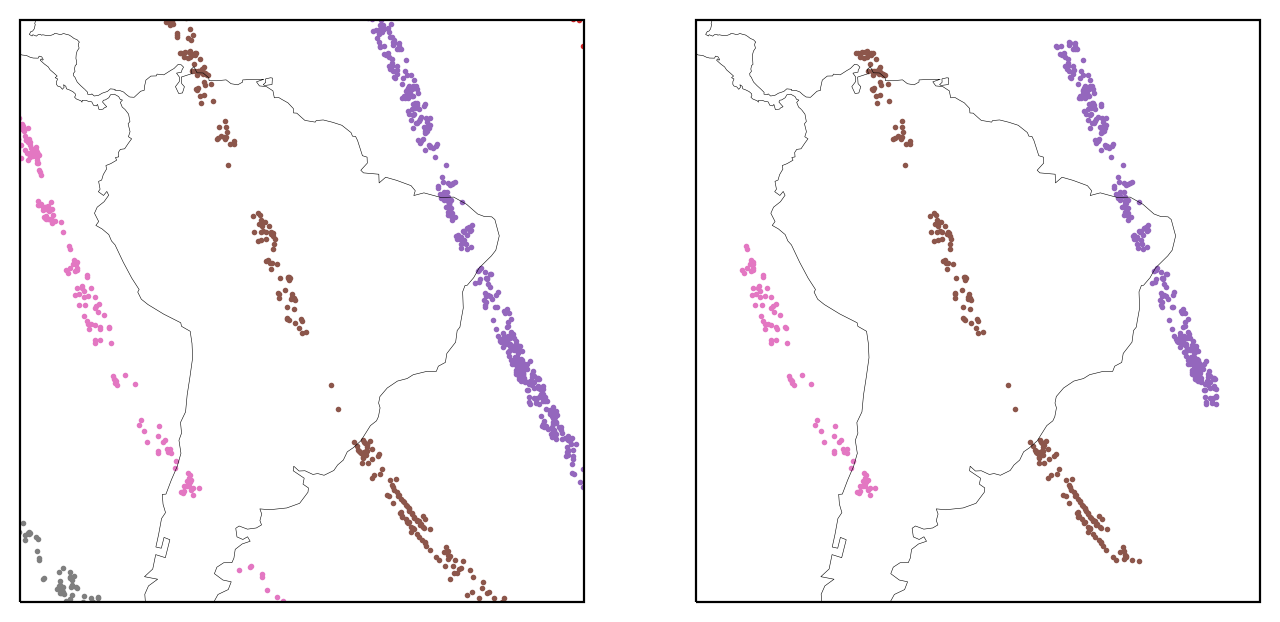

In [52]:
p_s = 0

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r
cmap = plt.cm.Blues

ticks = np.arange(0,18,3)

fig = plt.figure(figsize=(8,6),dpi=200)
gs = gridspec.GridSpec(1,2)

# =============================================================================

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.set_extent([-90,-25,-45,15])

for t in range(8):
    orbit_ref = data_pd[data_pd['orbit'] == orbits_ids[t]]
    ax1.scatter(orbit_ref['lon'][p_s:],orbit_ref['lat'][p_s:],s=1)

# =============================================================================

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.2,color='black',zorder=4)
ax1.set_extent([-90,-25,-45,15])

for t in range(8):
    orbit_ref = data[data['ORBIT'] == orbits_ids[t]]
    ax1.scatter(orbit_ref['lon'][p_s:],orbit_ref['lat'][p_s:],s=1)

# =============================================================================